In [1]:
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
%matplotlib inline

In [2]:
dblp_dataset_dir_path = "./evaloff3/data/complete_dblp/" # dblp v12 preprocessed

In [3]:
dblp_data = {}
chunkfiles = [f for f in os.listdir(dblp_dataset_dir_path) if 'chunk' in f]

fields_count = {}
for field in ['abstract', 'author_ids', 'id', 'reference_ids', 'citation_ids', 'title', 'venue_id', 'year', 'fos_ids']:
    fields_count[field] = 0

for filename in tqdm(chunkfiles):
    with open(dblp_dataset_dir_path + filename) as file:
        for ref in json.load(file):
            record = {}
            record['id'] = ref['id']
            record['year'] = int(ref['year'])
            record['title_count'] = len(ref['title'].split())
            if 'author_ids' in ref:
                record['author_count'] = len(ref['author_ids'])
            else:
                record['author_count'] = 0
            if 'abstract' in ref:
                record['abstract_count'] = len(ref['abstract'].split())
            else:
                record['abstract_count'] = 0
            if 'reference_ids' in ref:
                record['references_count'] = len(ref['reference_ids'])
            else:
                record['references_count'] = 0
            if 'citation_ids' in ref:
                record['citations_count'] = len(ref['citation_ids'])
            else:
                record['citations_count'] = 0
            if 'fos_ids' in ref:
                record['fos_count'] = len(ref['fos_ids'])
            else:
                record['fos_count'] = 0

            dblp_data[ref['id']] = record
            
            for field in fields_count.keys():
                if field in ref and ref[field]:
                    fields_count[field] += 1
            
len(dblp_data)

4894081

In [7]:
fields_count

{'abstract': 4232510,
 'author_ids': 4894063,
 'id': 4894081,
 'reference_ids': 3777107,
 'citation_ids': 3087508,
 'title': 4894081,
 'venue_id': 4843472,
 'year': 4894072,
 'fos_ids': 4877401}

In [8]:
def describe(values):
    print('Mean', np.mean(values))
    print('Std', np.std(values))
    print('Min', np.min(values))
    print('25', np.percentile(values, 25))
    print('50', np.median(values))
    print('75', np.percentile(values, 75))
    print('Max', np.max(values))

In [9]:
describe([record['year'] for record in dblp_data.values()])

Mean 2009.1450685021355
Std 9.343157185611856
Min 0
25 2005.0
50 2011.0
75 2016.0
Max 2020


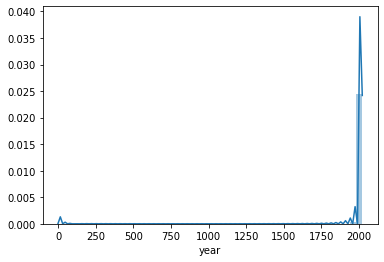

In [10]:
sns.distplot([record['year'] for record in dblp_data.values()], axlabel='year')

In [11]:
describe([record['title_count'] for record in dblp_data.values()])

Mean 9.70667445021854
Std 3.6293597407871228
Min 1
25 7.0
50 9.0
75 12.0
Max 68


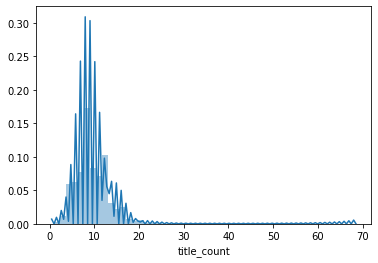

In [12]:
sns.distplot([record['title_count'] for record in dblp_data.values()],
             axlabel='title_count')

In [15]:
describe([record['abstract_count'] for record in dblp_data.values()])

Mean 121.76731688748102
Std 79.68154480449596
Min 0
25 76.0
50 124.0
75 166.0
Max 4276


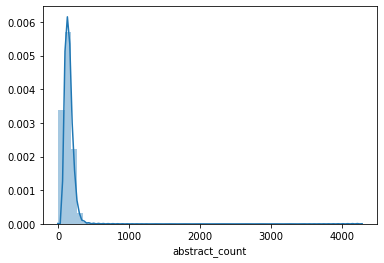

In [16]:
sns.distplot([record['abstract_count'] for record in dblp_data.values()],
             axlabel='abstract_count')

In [17]:
describe([record['author_count'] for record in dblp_data.values()])

Mean 3.0516147975483037
Std 1.8705588636348491
Min 0
25 2.0
50 3.0
75 4.0
Max 398


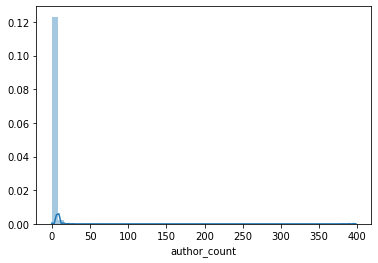

In [18]:
sns.distplot([record['author_count'] for record in dblp_data.values()],
             axlabel='author_count')

In [19]:
describe([record['citations_count'] for record in dblp_data.values()])

Mean 9.310052081279407
Std 60.599967758598204
Min 0
25 0.0
50 1.0
75 6.0
Max 22892


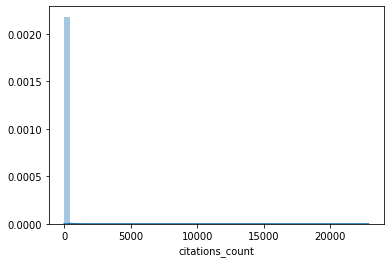

In [20]:
sns.distplot([record['citations_count'] for record in dblp_data.values()],
             axlabel='citations_count')

In [10]:
len([record['citations_count'] for record in dblp_data.values() if record['citations_count'] <= 50]) / len([record['citations_count'] for record in dblp_data.values()])

0.9679355531712696

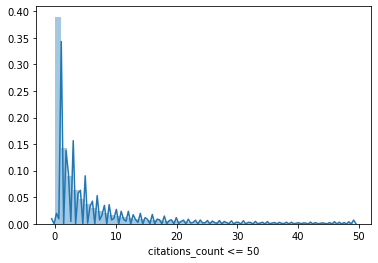

In [11]:
sns.distplot([record['citations_count'] for record in dblp_data.values() if record['citations_count'] < 50],
             axlabel='citations_count <= 50')

In [21]:
describe([record['references_count'] for record in dblp_data.values()])

Mean 9.310052081279407
Std 11.811093027115797
Min 0
25 1.0
50 6.0
75 13.0
Max 1812


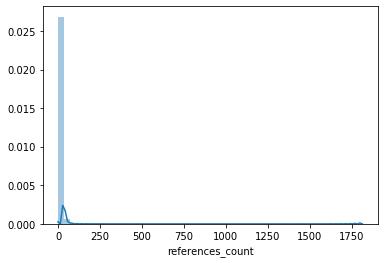

In [22]:
sns.distplot([record['references_count'] for record in dblp_data.values()], axlabel='references_count')

In [14]:
len([record['references_count'] for record in dblp_data.values() if record['references_count'] <= 50]) / len([record['references_count'] for record in dblp_data.values()])

0.9910876015333624

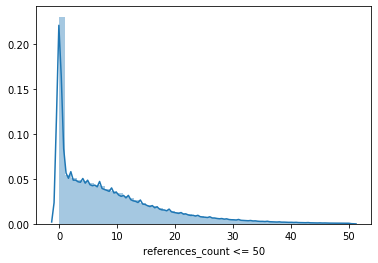

In [13]:
sns.distplot([record['references_count'] for record in dblp_data.values() if record['references_count'] <= 50],
             axlabel='references_count <= 50')

In [23]:
describe([record['fos_count'] for record in dblp_data.values()])

Mean 9.192211367159636
Std 2.7089907189986273
Min 0
25 8.0
50 10.0
75 11.0
Max 17


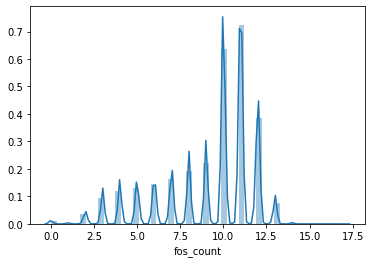

In [24]:
sns.distplot([record['fos_count'] for record in dblp_data.values()], axlabel='fos_count')